<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Anim_Aguas_Profundas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#librerias
import numpy as np #operaciones matemáticas
import matplotlib.pyplot as plt #libreria para gráficar
from matplotlib import animation # libreria para animaciones
from IPython.display import HTML # libreria necesaria para mostrar las animaciones en google colab
import matplotlib as mpl

def prof_rel(h_L):
    if h_L >= 0.5:
        text = 'Aguas Profundas'
    elif h_L < 0.5 and h_L > 0.05: #(1/20)
        text = 'Aguas Intermedias'
    else:
        text = 'Aguas Someras'
    return text

#Función para resolver la ecuación de dispersión, con entrada de h (profundidad) y T (periodo). Resultado: Celeridad
def dispersion(h,T,tol=1e-4):
  g = 9.81 #gravedad (m/s2)
  delta_c = 0.0001
  f = 1/T
  C = np.sqrt(g*h)
  while True:
    k = 2*np.pi*f/C
    C = np.sqrt(g/k*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

In [11]:
# Declaramos las variables de Entrada (Inputs)
T = 5
h = 50
H = 2.0
t_total = 60 #(s)

#Constantes
g   = 9.81 #(m/s2)
rho = 1000 #(kg/m3)

C = dispersion(h,T)
L = C*T
k = 2*np.pi/L
w = 2*np.pi/T
#C = w/k
# print('C = ',np.round(C,2),' m/s')
# print('L = ',np.round(L,2),' m')
# print('k = ',np.round(k,2),' 1/m')
# print('w = ',np.round(w,2),' 1/s')

dx = L/50 # resolucion en x
x  = np.arange(0,5*L+dx,dx)

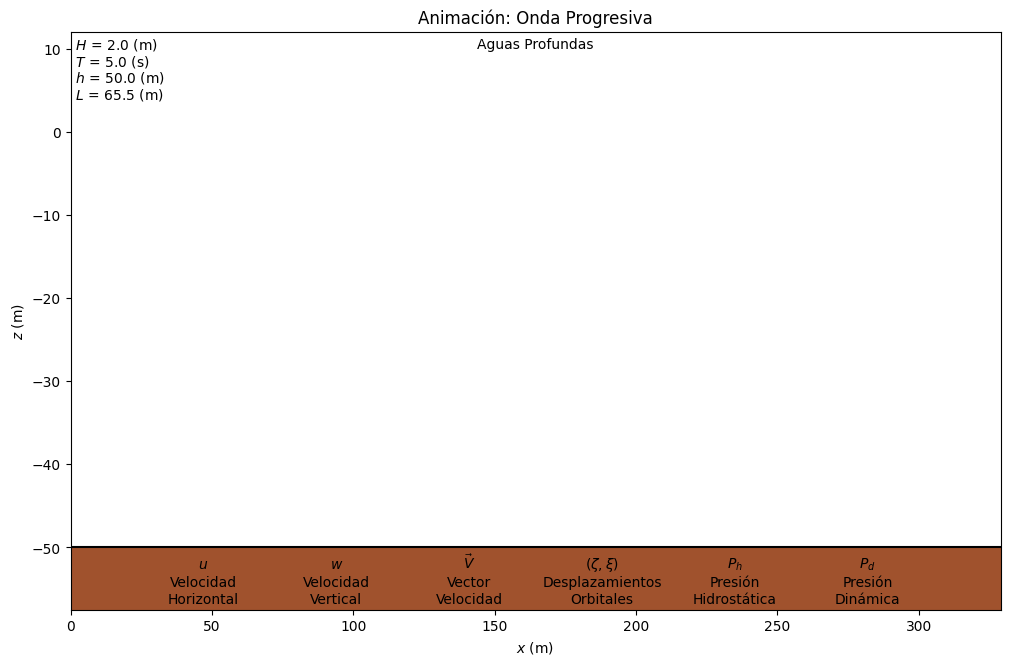

In [12]:
# Crearemos la figura a nuestra necesidad (antojo)
ancho = 12
alto  = 7.5

#Declaramos figura (fig) y eje (ax)
fig, ax = plt.subplots(figsize=(ancho,alto))

#Definir cosas que no se mueven (estáticas)
#definir todas las cosas estaticas
ax.set_xlabel('$x$ (m)')
ax.set_ylabel('$z$ (m)')
ax.set_title('Animación: Onda Progresiva')
ax.set_xlim(x[0],x[-1])
ax.set_ylim(-1.15*h,6*H)
ax.axhline(y=-h,c='k')
ax.fill_between(x,-1.15*h,-h,color='sienna',label='fondo',zorder=1)

puntos = 6
pos_z0 = -1.05*h
pos_z1 = -1.095*h
pos_z2 = -1.135*h
texto0 = ['$u$','$w$',r'$\vec{V}$',r'$(\zeta,\xi)$',r'$P_{h}$',r'$P_{d}$']
texto1 = ['Velocidad','Velocidad','Vector','Desplazamientos','Presión','Presión']
texto2 = ['Horizontal','Vertical','Velocidad','Orbitales','Hidrostática','Dinámica']

x0  = np.linspace(x[0],x[-1],puntos+2)

for i in range(puntos):
  ax.text(x0[i+1],pos_z0,texto0[i],horizontalalignment='center')
  ax.text(x0[i+1],pos_z1,texto1[i],horizontalalignment='center')
  ax.text(x0[i+1],pos_z2,texto2[i],horizontalalignment='center')

ax.text(x0[0],5*H,' $H$ = %1.1f (m)' % (H,),horizontalalignment='left')
ax.text(x0[0],4*H,' $T$ = %1.1f (s)' % (T,),horizontalalignment='left')
ax.text(x0[0],3*H,' $h$ = %1.1f (m)' % (h,),horizontalalignment='left')
ax.text(x0[0],2*H,' $L$ = %1.1f (m)' % (L,),horizontalalignment='left')
ax.text(np.mean(x),5*H,prof_rel(h/L),horizontalalignment='center')

dz = 30
x0_vec = x0[1]*np.ones(dz)
z0_vec = np.linspace(0,-h,dz)
XX,ZZ  = np.meshgrid(x0_vec,z0_vec)

In [13]:
#Cosas animadas
line, = ax.plot([],[],linewidth=1.0, color='k',zorder=2)
time_text = ax.text(5*L,5*H,'',fontsize=10,horizontalalignment='right',zorder=2)
Q = ax.quiver(XX, ZZ, np.zeros(np.shape(XX)),np.zeros(np.shape(XX)),scale=7.5,zorder=5)
Q2 = ax.quiver(XX, ZZ, np.zeros(np.shape(XX)),np.zeros(np.shape(XX)),scale=7.5,zorder=5)
Q3 = ax.quiver(XX, ZZ, np.zeros(np.shape(XX)),np.zeros(np.shape(XX)),scale=7.5,zorder=5)
Q4 = ax.quiver(XX, ZZ, np.zeros(np.shape(XX)),np.zeros(np.shape(XX)),color='darkorange',pivot= 'tip',scale=5000,zorder=5)
Q5 = ax.quiver(XX, ZZ, np.zeros(np.shape(XX)),np.zeros(np.shape(XX)),color='darkorange',pivot= 'tip',scale=100,zorder=5)
#fill_lines = ax.fill_between(x,-h,0,color='dodgerblue',label='onda',zorder=1)
scat = ax.scatter([],[],c='lime',s=30,edgecolor='k',zorder=5)
line2, = ax.plot([],[],linewidth=1.0, color='r',zorder=2)

ax.quiverkey(Q, 65, 7, 0.5,'0.5 (m/s)', coordinates='data')
ax.quiverkey(Q5, 225, 7, 5,'               5 (kPa) [$\\times$50 $P_{h}$]', coordinates='data')
ax.axhline(y=-L/2,c='k',linestyle='--',linewidth=0.5)
ax.text(x[1],-L/2,'$z = -\\dfrac{L}{2}$',horizontalalignment='left',verticalalignment='bottom')

def animate(t):
    eta = (H/2)*np.cos(k*x - w*t)
    for collection in ax.collections:
        if str(collection.get_label()) == 'onda':
            collection.remove()

    for i in range(1,len(x0)-1):
        eta0 = (H/2)*np.cos(k*x0[i] - w*t)
        Z0   = np.linspace(eta0,-h,30)
        XX1,ZZ1 = np.meshgrid(x0[i]*np.ones(30),Z0)
        if i == 1:
            u0 = (H/2)*w*np.cosh(k*(h+ZZ1))/np.sinh(k*h)*np.cos(k*XX1-w*t)
            Q.set_offsets(np.array([XX1.flatten(), ZZ1.flatten()]).T)
            Q.set_UVC(u0,np.zeros(np.shape(u0)))
        if i == 2:
            v0 = (H/2)*w*np.sinh(k*(h+ZZ1))/np.sinh(k*h)*np.sin(k*XX1-w*t)
            Q2.set_offsets(np.array([XX1.flatten(), ZZ1.flatten()]).T)
            Q2.set_UVC(np.zeros(np.shape(v0)),v0)
        if i == 3:
            u0 = (H/2)*w*np.cosh(k*(h+ZZ1))/np.sinh(k*h)*np.cos(k*XX1-w*t)
            v0 = (H/2)*w*np.sinh(k*(h+ZZ1))/np.sinh(k*h)*np.sin(k*XX1-w*t)
            Q3.set_offsets(np.array([XX1.flatten(), ZZ1.flatten()]).T)
            Q3.set_UVC(u0,v0)
        if i == 4:
            Z0   = np.linspace(0,-h,10)
            XX1,ZZ1 = np.meshgrid(x0[i]*np.ones(10),Z0)
            A = (H/2)*np.cosh(k*(h+ZZ1))/np.sinh(k*h)
            B = (H/2)*np.sinh(k*(h+ZZ1))/np.sinh(k*h)
            zeta = -A*np.sin(k*XX1-w*t)
            xi   = B*np.cos(k*XX1-w*t)
            XXX = XX1 + zeta
            ZZZ = ZZ1 + xi
            scat.set_offsets(np.array([XXX.flatten(), ZZZ.flatten()]).T)
        if i == 5:
            p_hidro = -rho*g*(ZZ1-eta0) #-rho*g*ZZ1
            p_hidro[np.where(ZZ1>0)] = rho*g*(eta0-ZZ1[np.where(ZZ1>0)])
            Q4.set_offsets(np.array([XX1.flatten(), ZZ1.flatten()]).T)
            Q4.set_UVC(p_hidro/1000,np.zeros(np.shape(p_hidro)))
        if i == 6:
            p_hidro = -rho*g*ZZ1
            Kp = np.cosh(k*(h+ZZ1))/np.cosh(k*h)
            p_dina = rho*g*eta0*Kp
            p_hidro[np.where(ZZ1>0)] = rho*g*(eta0-ZZ1[np.where(ZZ1>0)]) #*np.ones(len(ZZ1[np.where(ZZ1>0)]))
            p_dina[np.where(ZZ1>0)] = 0
            p_total = p_hidro + p_dina
            Q5.set_offsets(np.array([XX1.flatten(), ZZ1.flatten()]).T)
            Q5.set_UVC(p_dina/1000,np.zeros(np.shape(p_dina)))
    time_text.set_text('Tiempo = %1.0f (s)' % (t,))
    line.set_data(x,eta)

    fill_lines = ax.fill_between(x,-h,eta,color='dodgerblue',label='onda',zorder=1)

    return line, time_text, Q, Q2

anim = animation.FuncAnimation(fig,animate,frames = t_total+1, interval = 500, blit=False)
anim.save('Progressive_Wave_Distribution_Deep_Water.mp4',dpi=300)

HTML(anim.to_jshtml())